In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")
completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")
completed3=pd.read_excel("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details.xlsx")
incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 1, 2024 - Apr 14, 2024.csv")
incompleted2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - Apr 15, 2024 - Apr 30, 2024.csv")
incompleted3=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride Details (Historical) - May 1, 2024 - May 20, 2024.csv")

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/2198419674.py:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride - Apr 22, 2024 - Apr 28, 2024 (1).csv")
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/2198419674.py:6: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  completed2=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Completed Ride Details - Apr 29, 2024 - May 5, 2024 (1).csv")
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/2198419674.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  incompleted=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/dataset/Incomplete Ride 

In [2]:
incompleted_final = pd.concat([incompleted,incompleted2, incompleted3], ignore_index=True)
completed_final=pd.concat([completed,completed2,completed3],ignore_index=True)
incompleted_final=incompleted_final[['user_id','pickup_lat_long','request_made_at']]
completed_final=completed_final[['user_id','pickup_lat_long','request_made_at']]
dataset=pd.concat([completed_final,incompleted_final],ignore_index=True)

In [3]:
dataset['date_column'] = pd.to_datetime(dataset['request_made_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dataset['date_column'] = dataset['date_column'].fillna(pd.to_datetime(dataset['request_made_at'], format='%m/%d/%Y %H:%M', errors='coerce'))

In [4]:
import pandas as pd

dataset['date_column'] = pd.to_datetime(dataset['date_column'])

dataset['10min_window'] = dataset['date_column'].dt.floor('10min')

deduped_data = dataset.sort_values(['user_id', 'date_column']).drop_duplicates(['user_id', '10min_window'], keep='first')

dropped_rows = len(dataset) - len(deduped_data)

print(f"Number of rows dropped: {dropped_rows}")
dataset=deduped_data

Number of rows dropped: 124991


In [5]:
dataset_new=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/MLOPS/dateset final.csv")

In [7]:
dataset_new['date_column'] = pd.to_datetime(dataset_new['date_column'])

dataset_new['date_only'] = dataset_new['date_column'].dt.date

In [8]:
dataset_new['date_column'] = pd.to_datetime(dataset_new['date_column'])

dataset_new['10min_window'] = dataset_new['date_column'].dt.floor('10min')

deduped_data = dataset_new.sort_values(['createdBy.mobile', 'date_column']).drop_duplicates(['createdBy.mobile', '10min_window'], keep='first')

dropped_rows = len(dataset_new) - len(deduped_data)

print(f"Number of rows dropped: {dropped_rows}")
print(deduped_data)
dataset_new=deduped_data

Number of rows dropped: 36727
        Unnamed: 0              bookingStatusText         bookingId  \
140148      213241                      Completed   KOL891717566602   
140295      213388                        Expired  KOL6701717567283   
140383      213476                      Completed  KOL3471717567742   
140407      213500                      Completed  KOL4111717567862   
140904      213997             Customer Cancelled  KOL3721717570758   
...            ...                            ...               ...   
64030       137122  Request Cancelled By Customer  KOL4591716816222   
132014      205107                      Completed  KOL3731717434905   
132666      205759                      Completed  KOL4341717470129   
135911      209004                      Completed  KOL6911717505209   
126643      199735                      Completed  KOL2301717399105   

        pickup.location.latitude  pickup.location.longitude  \
140148                 22.584985                  88.4

In [9]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105965 entries, 140148 to 126643
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Unnamed: 0                 105965 non-null  int64         
 1   bookingStatusText          105965 non-null  object        
 2   bookingId                  105965 non-null  object        
 3   pickup.location.latitude   105965 non-null  float64       
 4   pickup.location.longitude  105965 non-null  float64       
 5   bookingDateDevice          105965 non-null  object        
 6   createdBy.mobile           105965 non-null  float64       
 7   date_column                105965 non-null  datetime64[ns]
 8   date_only                  105965 non-null  object        
 9   10min_window               105965 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [11]:
dataset_new_modi=dataset_new[['date_column','pickup.location.latitude','pickup.location.longitude']]

In [13]:
dataset[['latitude', 'longitude']] = dataset['pickup_lat_long'].str.split(',', expand=True)


In [14]:
dataset_modi=dataset[['latitude','longitude','date_column']]

In [15]:
dataset_modi.head()

,latitude,longitude,date_column
222501,22.587597,88.498335,2024-04-09 15:49:01
388868,22.57818,88.482403,2024-04-20 18:28:00
388864,22.577507,88.482128,2024-04-23 10:07:00
388867,22.573576,88.508162,2024-04-23 14:23:00
22735,22.559161,88.513259,2024-04-23 15:53:55


In [17]:
dataset_new_modi['latitude']=dataset_new_modi['pickup.location.latitude']
dataset_new_modi['longitude']=dataset_new_modi['pickup.location.longitude']

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/2265977302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new_modi['latitude']=dataset_new_modi['pickup.location.latitude']
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/2265977302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_new_modi['longitude']=dataset_new_modi['pickup.location.longitude']


In [77]:
dataset_new_modi

,latitude,longitude,date_column,date_only
34,22.593107,88.353310,2024-05-21 00:00:05,2024-05-21
37,22.660438,88.396216,2024-05-21 00:00:26,2024-05-21
35,22.643219,88.438817,2024-05-21 00:01:52,2024-05-21
55,22.643219,88.438817,2024-05-21 00:03:38,2024-05-21
36,22.578710,88.460301,2024-05-21 00:03:59,2024-05-21
...,...,...,...,...
112121,22.483522,88.384365,2025-06-01 17:52:00,2025-06-01
131322,22.557150,88.314533,2025-06-03 06:40:00,2025-06-03
126688,22.474227,88.352788,2025-06-03 13:00:00,2025-06-03
130939,22.609180,88.439232,2025-06-03 21:02:00,2025-06-03


In [24]:
dataset_new_modi=dataset_new_modi[['latitude','longitude','date_column']]

In [25]:
dataset_modi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 415743 entries, 222501 to 95752
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   latitude     415743 non-null  object        
 1   longitude    415743 non-null  object        
 2   date_column  415743 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 12.7+ MB


In [53]:
dataset_new_modi['date_only'] = dataset_new_modi['date_column'].dt.date


In [72]:
comparison_date = pd.to_datetime('2024-06-05').date()

filtered_dataset = dataset_new_modi[dataset_new_modi['date_only'] < comparison_date]

# Display the filtered DataFrame
print(filtered_dataset)

         latitude  longitude         date_column   date_only
34      22.593107  88.353310 2024-05-21 00:00:05  2024-05-21
37      22.660438  88.396216 2024-05-21 00:00:26  2024-05-21
35      22.643219  88.438817 2024-05-21 00:01:52  2024-05-21
55      22.643219  88.438817 2024-05-21 00:03:38  2024-05-21
36      22.578710  88.460301 2024-05-21 00:03:59  2024-05-21
...           ...        ...                 ...         ...
137711  22.642386  88.438917 2024-06-04 23:53:40  2024-06-04
137723  22.643219  88.438817 2024-06-04 23:55:21  2024-06-04
137713  22.643219  88.438817 2024-06-04 23:57:26  2024-06-04
137715  22.573708  88.434035 2024-06-04 23:58:42  2024-06-04
137619  22.522394  88.363983 2024-06-04 23:59:12  2024-06-04

[101707 rows x 4 columns]


In [80]:
comparison_date = pd.to_datetime('2024-05-20').date()

filtered_dataset = dataset_new_modi[dataset_new_modi['date_only'] > comparison_date]

# Display the filtered DataFrame
print(filtered_dataset)

         latitude  longitude         date_column   date_only
34      22.593107  88.353310 2024-05-21 00:00:05  2024-05-21
37      22.660438  88.396216 2024-05-21 00:00:26  2024-05-21
35      22.643219  88.438817 2024-05-21 00:01:52  2024-05-21
55      22.643219  88.438817 2024-05-21 00:03:38  2024-05-21
36      22.578710  88.460301 2024-05-21 00:03:59  2024-05-21
...           ...        ...                 ...         ...
112121  22.483522  88.384365 2025-06-01 17:52:00  2025-06-01
131322  22.557150  88.314533 2025-06-03 06:40:00  2025-06-03
126688  22.474227  88.352788 2025-06-03 13:00:00  2025-06-03
130939  22.609180  88.439232 2025-06-03 21:02:00  2025-06-03
137727  22.464558  88.364774 2025-06-05 04:15:00  2025-06-05

[105965 rows x 4 columns]


In [81]:
filtered_dataset

,latitude,longitude,date_column,date_only
34,22.593107,88.353310,2024-05-21 00:00:05,2024-05-21
37,22.660438,88.396216,2024-05-21 00:00:26,2024-05-21
35,22.643219,88.438817,2024-05-21 00:01:52,2024-05-21
55,22.643219,88.438817,2024-05-21 00:03:38,2024-05-21
36,22.578710,88.460301,2024-05-21 00:03:59,2024-05-21
...,...,...,...,...
112121,22.483522,88.384365,2025-06-01 17:52:00,2025-06-01
131322,22.557150,88.314533,2025-06-03 06:40:00,2025-06-03
126688,22.474227,88.352788,2025-06-03 13:00:00,2025-06-03
130939,22.609180,88.439232,2025-06-03 21:02:00,2025-06-03


In [84]:
comparison_date = pd.to_datetime('2024-05-06').date()

super_filt = filtered_dataset[filtered_dataset['date_only'] > comparison_date]

# Display the filtered DataFrame
print(super_filt)

         latitude  longitude         date_column   date_only
34      22.593107  88.353310 2024-05-21 00:00:05  2024-05-21
37      22.660438  88.396216 2024-05-21 00:00:26  2024-05-21
35      22.643219  88.438817 2024-05-21 00:01:52  2024-05-21
55      22.643219  88.438817 2024-05-21 00:03:38  2024-05-21
36      22.578710  88.460301 2024-05-21 00:03:59  2024-05-21
...           ...        ...                 ...         ...
112121  22.483522  88.384365 2025-06-01 17:52:00  2025-06-01
131322  22.557150  88.314533 2025-06-03 06:40:00  2025-06-03
126688  22.474227  88.352788 2025-06-03 13:00:00  2025-06-03
130939  22.609180  88.439232 2025-06-03 21:02:00  2025-06-03
137727  22.464558  88.364774 2025-06-05 04:15:00  2025-06-05

[105965 rows x 4 columns]


In [87]:
super_filt = super_filt.iloc[:-50]


In [88]:
super_filt

,latitude,longitude,date_column,date_only
34,22.593107,88.353310,2024-05-21 00:00:05,2024-05-21
37,22.660438,88.396216,2024-05-21 00:00:26,2024-05-21
35,22.643219,88.438817,2024-05-21 00:01:52,2024-05-21
55,22.643219,88.438817,2024-05-21 00:03:38,2024-05-21
36,22.578710,88.460301,2024-05-21 00:03:59,2024-05-21
...,...,...,...,...
92786,12.992512,77.691554,2024-06-13 19:14:00,2024-06-13
90325,22.575844,88.409902,2024-06-14 04:40:00,2024-06-14
88051,22.534990,88.280259,2024-06-14 09:30:00,2024-06-14
32518,22.640808,88.399498,2024-06-14 12:15:00,2024-06-14


In [90]:
super_filt = super_filt.iloc[:-47]


In [91]:
super_filt.tail(10)

,latitude,longitude,date_column,date_only
140082,22.557305,88.352809,2024-06-05 20:00:20,2024-06-05
135868,22.609959,88.432709,2024-06-05 20:10:00,2024-06-05
124780,22.643219,88.438817,2024-06-05 20:15:00,2024-06-05
131531,22.631126,88.391109,2024-06-05 20:45:00,2024-06-05
64961,22.552751,88.374342,2024-06-05 20:45:00,2024-06-05
133061,22.552751,88.374342,2024-06-05 20:50:00,2024-06-05
138118,22.627593,88.400149,2024-06-05 21:00:00,2024-06-05
141901,22.643219,88.438817,2024-06-05 21:20:50,2024-06-05
141886,22.643219,88.438817,2024-06-05 21:30:37,2024-06-05
142339,22.574799,88.433663,2024-06-05 21:51:00,2024-06-05


In [92]:
super_filt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105868 entries, 34 to 142339
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   latitude     105868 non-null  float64       
 1   longitude    105868 non-null  float64       
 2   date_column  105868 non-null  datetime64[ns]
 3   date_only    105868 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 4.0+ MB


In [75]:
filtered_dataset.sort_values(by='date_column', inplace=True)

In [76]:
filtered_dataset

,latitude,longitude,date_column,date_only


In [49]:
dataset_new_modi.comparison_date = pd.to_datetime('2024-06-05').date()

filtered_dataset = dataset_new_modi[dataset_new_modi['date_only'] < comparison_date]

# Display the filtered DataFrame
print(filtered_dataset)

In [67]:
dataset_new_modi.tail(50)

,latitude,longitude,date_column,date_only
129811,22.601978,88.383004,2024-06-20 04:00:00,2024-06-20
7109,22.555159,88.377869,2024-06-20 22:30:52,2024-06-20
127383,22.595521,88.434469,2024-06-21 18:00:00,2024-06-21
36847,22.698428,88.375938,2024-06-26 21:25:00,2024-06-26
37996,22.446377,88.400955,2024-07-05 23:00:20,2024-07-05
18913,22.639897,88.450352,2024-07-07 04:30:19,2024-07-07
76156,22.447326,88.391965,2024-08-10 11:22:00,2024-08-10
66008,22.632906,88.400706,2024-10-11 22:00:00,2024-10-11
0,21.151338,72.777507,2025-01-26 14:22:00,2025-01-26
829,22.572492,88.377750,2025-04-06 10:09:00,2025-04-06


In [27]:
del dataset

In [57]:
dataset=pd.concat([dataset_modi,dataset_new_modi],ignore_index=True)

In [58]:
dataset

,latitude,longitude,date_column,date_only
0,22.587597,88.498335,2024-04-09 15:49:01,NaN
1,22.57818,88.482403,2024-04-20 18:28:00,NaN
2,22.577507,88.482128,2024-04-23 10:07:00,NaN
3,22.573576,88.508162,2024-04-23 14:23:00,NaN
4,22.559161,88.513259,2024-04-23 15:53:55,NaN
...,...,...,...,...
521703,22.483522,88.384365,2025-06-01 17:52:00,2025-06-01
521704,22.55715,88.314533,2025-06-03 06:40:00,2025-06-03
521705,22.474227,88.352788,2025-06-03 13:00:00,2025-06-03
521706,22.60918,88.439232,2025-06-03 21:02:00,2025-06-03


In [59]:
dataset.sort_values(by='date_column', inplace=True)

In [60]:
dataset.tail(50)

,latitude,longitude,date_column,date_only
521658,22.601978,88.383004,2024-06-20 04:00:00,2024-06-20
521659,22.555159,88.377869,2024-06-20 22:30:52,2024-06-20
521660,22.595521,88.434469,2024-06-21 18:00:00,2024-06-21
521661,22.698428,88.375938,2024-06-26 21:25:00,2024-06-26
521662,22.446377,88.400955,2024-07-05 23:00:20,2024-07-05
521663,22.639897,88.450352,2024-07-07 04:30:19,2024-07-07
521664,22.447326,88.391965,2024-08-10 11:22:00,2024-08-10
521665,22.632906,88.400706,2024-10-11 22:00:00,2024-10-11
521666,21.151338,72.777507,2025-01-26 14:22:00,2025-01-26
521667,22.572492,88.37775,2025-04-06 10:09:00,2025-04-06


In [93]:
dataset_new_modi_new=super_filt

In [97]:
dataset_new_modi=dataset_new_modi_new[['latitude','longitude','date_column']]

In [98]:
dataset=pd.concat([dataset_modi,dataset_new_modi],ignore_index=True)

In [96]:
dataset_modi.head()

,latitude,longitude,date_column
222501,22.587597,88.498335,2024-04-09 15:49:01
388868,22.57818,88.482403,2024-04-20 18:28:00
388864,22.577507,88.482128,2024-04-23 10:07:00
388867,22.573576,88.508162,2024-04-23 14:23:00
22735,22.559161,88.513259,2024-04-23 15:53:55


In [99]:
from haversine import haversine, Unit
dataset['latitude'] = dataset['latitude'].astype(float)
dataset['longitude'] = dataset['longitude'].astype(float)

dakshindari= (22.604061, 88.403715)
sector_5=(22.576222, 88.435053)
victoria_memorial=(22.545888, 88.344416)
howrah=(22.583474, 88.342969)
airport=(22.642434, 88.439351)

def calculate_distance(coords,lat, lon):
    point_coords = (lat, lon)
    return haversine(coords, point_coords, unit=Unit.KILOMETERS)

dataset['aerial_dist_dakshindari'] = dataset.apply(
    lambda row: calculate_distance(dakshindari,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_sector_V'] = dataset.apply(
    lambda row: calculate_distance(sector_5,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_victoria_memorial'] = dataset.apply(
    lambda row: calculate_distance(victoria_memorial,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_howrah'] = dataset.apply(
    lambda row: calculate_distance(howrah,row['latitude'], row['longitude']), axis=1
)
dataset['aerial_dist_airport'] = dataset.apply(
    lambda row: calculate_distance(airport,row['latitude'], row['longitude']), axis=1
)

In [100]:
dataset_victoria=dataset[dataset['aerial_dist_victoria_memorial']<2]
dataset_airport=dataset[dataset['aerial_dist_airport']<2]
dataset_dakshindari=dataset[dataset['aerial_dist_dakshindari']<2]
dataset_howrah=dataset[dataset['aerial_dist_howrah']<2]
dataset_sectorV=dataset[dataset['aerial_dist_sector_V']<2]

In [101]:
from datetime import datetime, timedelta
import pandas as pd


########## Overall############
dataset['date'] = dataset['date_column'].dt.date
dataset['hour'] = dataset['date_column'].dt.hour
hourly_demand = dataset.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand['ds'] = hourly_demand.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand = hourly_demand.drop(columns=['date', 'hour'])
hourly_demand['ds'] = pd.to_datetime(hourly_demand['ds'])

all_hours = pd.date_range(start=hourly_demand['ds'].min(), end=hourly_demand['ds'].max(), freq='H')
hourly_demand = hourly_demand.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand = hourly_demand.rename(columns={'index': 'ds'})
hourly_demand = hourly_demand.set_index('ds')


############ Airport #########
dataset_airport['date'] = dataset_airport['date_column'].dt.date
dataset_airport['hour'] = dataset_airport['date_column'].dt.hour
hourly_demand_airpot = dataset_airport.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand_airpot['ds'] = hourly_demand_airpot.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand_airpot = hourly_demand_airpot.drop(columns=['date', 'hour'])
hourly_demand_airpot['ds'] = pd.to_datetime(hourly_demand_airpot['ds'])

all_hours = pd.date_range(start=hourly_demand_airpot['ds'].min(), end=hourly_demand_airpot['ds'].max(), freq='H')
hourly_demand_airpot = hourly_demand_airpot.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand_airpot = hourly_demand_airpot.rename(columns={'index': 'ds'})
hourly_demand_airpot= hourly_demand_airpot.set_index('ds')

########### Rabindrasadan ##########
dataset_victoria['date'] = dataset_victoria['date_column'].dt.date
dataset_victoria['hour'] = dataset_victoria['date_column'].dt.hour
hourly_demand_victoria = dataset_victoria.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand_victoria['ds'] = hourly_demand_victoria.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand_victoria = hourly_demand_victoria.drop(columns=['date', 'hour'])
hourly_demand_victoria['ds'] = pd.to_datetime(hourly_demand_victoria['ds'])

all_hours = pd.date_range(start=hourly_demand_victoria['ds'].min(), end=hourly_demand_victoria['ds'].max(), freq='H')
hourly_demand_victoria = hourly_demand_victoria.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand_victoria = hourly_demand_victoria.rename(columns={'index': 'ds'})
hourly_demand_victoria = hourly_demand_victoria.set_index('ds')

############## Howrah #########
dataset_howrah['date'] = dataset_howrah['date_column'].dt.date
dataset_howrah['hour'] = dataset_howrah['date_column'].dt.hour
hourly_demand_howrah = dataset_howrah.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand_howrah['ds'] = hourly_demand_howrah.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand_howrah = hourly_demand_howrah.drop(columns=['date', 'hour'])
hourly_demand_howrah['ds'] = pd.to_datetime(hourly_demand_howrah['ds'])

all_hours = pd.date_range(start=hourly_demand_howrah['ds'].min(), end=hourly_demand_howrah['ds'].max(), freq='H')
hourly_demand_howrah = hourly_demand_howrah.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand_howrah = hourly_demand_howrah.rename(columns={'index': 'ds'})
hourly_demand_howrah = hourly_demand_howrah.set_index('ds')


########## DakshinDari ###########
dataset_dakshindari['date'] = dataset_dakshindari['date_column'].dt.date
dataset_dakshindari['hour'] = dataset_dakshindari['date_column'].dt.hour
hourly_demand_dakshinDari = dataset_dakshindari.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand_dakshinDari['ds'] = hourly_demand_dakshinDari.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand_dakshinDari = hourly_demand_dakshinDari.drop(columns=['date', 'hour'])
hourly_demand_dakshinDari['ds'] = pd.to_datetime(hourly_demand_dakshinDari['ds'])

all_hours = pd.date_range(start=hourly_demand_dakshinDari['ds'].min(), end=hourly_demand_dakshinDari['ds'].max(), freq='H')
hourly_demand_dakshinDari = hourly_demand_dakshinDari.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand_dakshinDari = hourly_demand_dakshinDari.rename(columns={'index': 'ds'})
hourly_demand_dakshinDari = hourly_demand_dakshinDari.set_index('ds')


########### Sector V ###########
dataset_sectorV['date'] = dataset_sectorV['date_column'].dt.date
dataset_sectorV['hour'] = dataset_sectorV['date_column'].dt.hour
hourly_demand_sectorV = dataset_sectorV.groupby(['date', 'hour']).size().reset_index(name='y')
hourly_demand_sectorV['ds'] = hourly_demand_sectorV.apply(lambda row: datetime.combine(row['date'], datetime.min.time()) + timedelta(hours=row['hour']), axis=1)
hourly_demand_sectorV = hourly_demand_sectorV.drop(columns=['date', 'hour'])
hourly_demand_sectorV['ds'] = pd.to_datetime(hourly_demand_sectorV['ds'])

all_hours = pd.date_range(start=hourly_demand_sectorV['ds'].min(), end=hourly_demand_sectorV['ds'].max(), freq='H')
hourly_demand_sectorV = hourly_demand_sectorV.set_index('ds').reindex(all_hours, fill_value=0).reset_index()
hourly_demand_sectorV = hourly_demand_sectorV.rename(columns={'index': 'ds'})
hourly_demand_sectorV = hourly_demand_sectorV.set_index('ds')


/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/723011333.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_airport['date'] = dataset_airport['date_column'].dt.date
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/723011333.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_airport['hour'] = dataset_airport['date_column'].dt.hour
/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_21396/723011333.py:33: SettingWithCopyWarning: 
A value is trying t

In [111]:
hourly_demand.info()
hourly_demand_airpot.info()
hourly_demand_dakshinDari.info()
hourly_demand_victoria.info()
hourly_demand_sectorV.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1582 entries, 2024-04-01 00:00:00 to 2024-06-05 21:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       1582 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1582 entries, 2024-04-01 00:00:00 to 2024-06-05 21:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       1582 non-null   int64
dtypes: int64(1)
memory usage: 24.7 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1577 entries, 2024-04-01 00:00:00 to 2024-06-05 16:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   y       1577 non-null   int64
dtypes: int64(1)
memory usage: 24.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1581 entries, 2024-04-01 00:00:00 to 2024-06-05 20:00:00
Data columns (total 1 columns):


In [171]:
weather_data=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/SaltLake2_20240306_20240605.csv")

In [172]:
weather_data=weather_data[:94480]

In [173]:
import pandas as pd


# Convert 'device_date_time' to datetime
weather_data['device_date_time'] = pd.to_datetime(weather_data['device_date_time'])

# Set 'device_date_time' as the index
weather_data.set_index('device_date_time', inplace=True)

# Resample to hourly frequency and aggregate (taking the first entry of each hour)
hourly_weather_data = weather_data.resample('H').first()

# Reset the index if needed
hourly_weather_data.reset_index(inplace=True)

# Display the resulting DataFrame
print(hourly_weather_data)


        device_date_time city_name locality_name  rain_intensity  \
0    2024-03-31 23:00:00   Kolkata   Salt Lake 2             0.0   
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1580 2024-06-05 19:00:00   Kolkata   Salt Lake 2             0.0   
1581 2024-06-05 20:00:00   Kolkata   Salt Lake 2             0.0   
1582 2024-06-05 21:00:00   Kolkata   Salt Lake 2             0.0   
1583 2024-06-05 22:00:00   Kolkata   Salt Lake 2             0.0   
1584 2024-06-05 23:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed  
0                   0.0     85.46        28.78           236.8        1.20  
1                   0.0     8

In [174]:
weather_data=hourly_weather_data

In [177]:
hourly_demand_new.reset_index(inplace=True)


In [178]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand_new)

hourly_demand_new["ds"] = pd.to_datetime(hourly_demand_new["ds"])

# Set the index to ds
hourly_demand_new.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
merged_df = pd.merge(weather_data, hourly_demand_new, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
merged_df.drop(columns=["device_date_hour"], inplace=True)

print(merged_df)

        device_date_time city_name locality_name  rain_intensity  \
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
5    2024-04-01 04:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1578 2024-06-05 17:00:00   Kolkata   Salt Lake 2             0.0   
1579 2024-06-05 18:00:00   Kolkata   Salt Lake 2             0.0   
1580 2024-06-05 19:00:00   Kolkata   Salt Lake 2             0.0   
1581 2024-06-05 20:00:00   Kolkata   Salt Lake 2             0.0   
1582 2024-06-05 21:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed   y  
1                   0.0     85.60        28.82           208.8        0.39  64  
2                   0

In [ ]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand_new)

hourly_demand_new["ds"] = pd.to_datetime(hourly_demand_new["ds"])

# Set the index to ds
hourly_demand_new.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
merged_df = pd.merge(weather_data, hourly_demand_new, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
merged_df.drop(columns=["device_date_hour"], inplace=True)

print(merged_df)

In [180]:
hourly_demand.reset_index(inplace=True)
hourly_demand_airpot.reset_index(inplace=True)
hourly_demand_dakshinDari.reset_index(inplace=True)
hourly_demand_howrah.reset_index(inplace=True)
hourly_demand_sectorV.reset_index(inplace=True)
hourly_demand_victoria.reset_index(inplace=True)

In [181]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand)

hourly_demand["ds"] = pd.to_datetime(hourly_demand["ds"])

# Set the index to ds
hourly_demand.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
hourly_demand = pd.merge(weather_data, hourly_demand, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
hourly_demand.drop(columns=["device_date_hour"], inplace=True)

print(hourly_demand)

        device_date_time city_name locality_name  rain_intensity  \
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
5    2024-04-01 04:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1578 2024-06-05 17:00:00   Kolkata   Salt Lake 2             0.0   
1579 2024-06-05 18:00:00   Kolkata   Salt Lake 2             0.0   
1580 2024-06-05 19:00:00   Kolkata   Salt Lake 2             0.0   
1581 2024-06-05 20:00:00   Kolkata   Salt Lake 2             0.0   
1582 2024-06-05 21:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed   y  
1                   0.0     85.60        28.82           208.8        0.39  64  
2                   0

In [182]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand_airpot)

hourly_demand_airpot["ds"] = pd.to_datetime(hourly_demand_airpot["ds"])

# Set the index to ds
hourly_demand_airpot.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
hourly_demand_airpot = pd.merge(weather_data, hourly_demand_airpot, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
hourly_demand_airpot.drop(columns=["device_date_hour"], inplace=True)

print(hourly_demand_airpot)

        device_date_time city_name locality_name  rain_intensity  \
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
5    2024-04-01 04:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1578 2024-06-05 17:00:00   Kolkata   Salt Lake 2             0.0   
1579 2024-06-05 18:00:00   Kolkata   Salt Lake 2             0.0   
1580 2024-06-05 19:00:00   Kolkata   Salt Lake 2             0.0   
1581 2024-06-05 20:00:00   Kolkata   Salt Lake 2             0.0   
1582 2024-06-05 21:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed   y  
1                   0.0     85.60        28.82           208.8        0.39  12  
2                   0

In [183]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand_dakshinDari)

hourly_demand_dakshinDari["ds"] = pd.to_datetime(hourly_demand_dakshinDari["ds"])

# Set the index to ds
hourly_demand_dakshinDari.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
hourly_demand_dakshinDari = pd.merge(weather_data, hourly_demand_dakshinDari, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
hourly_demand_dakshinDari.drop(columns=["device_date_hour"], inplace=True)

print(hourly_demand_dakshinDari)

        device_date_time city_name locality_name  rain_intensity  \
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
5    2024-04-01 04:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1573 2024-06-05 12:00:00   Kolkata   Salt Lake 2             0.0   
1574 2024-06-05 13:00:00   Kolkata   Salt Lake 2             0.0   
1575 2024-06-05 14:00:00   Kolkata   Salt Lake 2             0.0   
1576 2024-06-05 15:00:00   Kolkata   Salt Lake 2             0.0   
1577 2024-06-05 16:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed   y  
1                   0.0     85.60        28.82           208.8        0.39   4  
2                   0

In [184]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand_howrah)

hourly_demand_howrah["ds"] = pd.to_datetime(hourly_demand_howrah["ds"])

# Set the index to ds
hourly_demand_howrah.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
hourly_demand_howrah = pd.merge(weather_data, hourly_demand_howrah, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
hourly_demand_howrah.drop(columns=["device_date_hour"], inplace=True)

print(hourly_demand_howrah)

        device_date_time city_name locality_name  rain_intensity  \
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
5    2024-04-01 04:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1574 2024-06-05 13:00:00   Kolkata   Salt Lake 2             0.0   
1575 2024-06-05 14:00:00   Kolkata   Salt Lake 2             0.0   
1576 2024-06-05 15:00:00   Kolkata   Salt Lake 2             0.0   
1577 2024-06-05 16:00:00   Kolkata   Salt Lake 2             0.0   
1578 2024-06-05 17:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed   y  
1                   0.0     85.60        28.82           208.8        0.39  22  
2                   0

In [185]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand_sectorV)

hourly_demand_sectorV["ds"] = pd.to_datetime(hourly_demand_sectorV["ds"])

# Set the index to ds
hourly_demand_sectorV.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
hourly_demand_sectorV = pd.merge(weather_data, hourly_demand_sectorV, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
hourly_demand_sectorV.drop(columns=["device_date_hour"], inplace=True)

print(hourly_demand_sectorV)

        device_date_time city_name locality_name  rain_intensity  \
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
5    2024-04-01 04:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1578 2024-06-05 17:00:00   Kolkata   Salt Lake 2             0.0   
1579 2024-06-05 18:00:00   Kolkata   Salt Lake 2             0.0   
1580 2024-06-05 19:00:00   Kolkata   Salt Lake 2             0.0   
1581 2024-06-05 20:00:00   Kolkata   Salt Lake 2             0.0   
1582 2024-06-05 21:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed  y  
1                   0.0     85.60        28.82           208.8        0.39  2  
2                   0.0

In [186]:
weather_data["device_date_time"] = pd.to_datetime(weather_data["device_date_time"])

# Extract the hour and date
weather_data["device_date_hour"] = weather_data["device_date_time"].dt.floor('H')

# Second DataFrame (hourly_demand_victoria)

hourly_demand_victoria["ds"] = pd.to_datetime(hourly_demand_victoria["ds"])

# Set the index to ds
hourly_demand_victoria.set_index("ds", inplace=True)

# Merge the DataFrames on the hour and date
hourly_demand_victoria = pd.merge(weather_data, hourly_demand_victoria, left_on="device_date_hour", right_index=True, how="right")

# Drop the helper column if necessary
hourly_demand_victoria.drop(columns=["device_date_hour"], inplace=True)

print(hourly_demand_victoria)

        device_date_time city_name locality_name  rain_intensity  \
1    2024-04-01 00:00:00   Kolkata   Salt Lake 2             0.0   
2    2024-04-01 01:00:00   Kolkata   Salt Lake 2             0.0   
3    2024-04-01 02:00:00   Kolkata   Salt Lake 2             0.0   
4    2024-04-01 03:00:00   Kolkata   Salt Lake 2             0.0   
5    2024-04-01 04:00:00   Kolkata   Salt Lake 2             0.0   
...                  ...       ...           ...             ...   
1577 2024-06-05 16:00:00   Kolkata   Salt Lake 2             0.0   
1578 2024-06-05 17:00:00   Kolkata   Salt Lake 2             0.0   
1579 2024-06-05 18:00:00   Kolkata   Salt Lake 2             0.0   
1580 2024-06-05 19:00:00   Kolkata   Salt Lake 2             0.0   
1581 2024-06-05 20:00:00   Kolkata   Salt Lake 2             0.0   

      rain_accumulation  humidity  temperature  wind_direction  wind_speed   y  
1                   0.0     85.60        28.82           208.8        0.39   5  
2                   0

In [187]:
hourly_demand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1582 entries, 1 to 1582
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   device_date_time   1582 non-null   datetime64[ns]
 1   city_name          1579 non-null   object        
 2   locality_name      1579 non-null   object        
 3   rain_intensity     1579 non-null   float64       
 4   rain_accumulation  1579 non-null   float64       
 5   humidity           1579 non-null   float64       
 6   temperature        1579 non-null   float64       
 7   wind_direction     1579 non-null   float64       
 8   wind_speed         1579 non-null   float64       
 9   y                  1582 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 136.0+ KB


In [194]:
hourly_demand=hourly_demand[['y','rain_intensity','rain_accumulation','temperature']]
for lag in [1, 8, 12, 24]:
    hourly_demand[f'lag_{lag}'] = hourly_demand['y'].shift(lag)

In [195]:
hourly_demand_airpot=hourly_demand_airpot[['y','rain_intensity','rain_accumulation','temperature']]
for lag in [1, 8, 12, 24]:
    hourly_demand_airpot[f'lag_{lag}'] = hourly_demand_airpot['y'].shift(lag)

In [196]:
hourly_demand_dakshinDari=hourly_demand_dakshinDari[['y','rain_intensity','rain_accumulation','temperature']]
for lag in [1, 8, 12, 24]:
    hourly_demand_dakshinDari[f'lag_{lag}'] = hourly_demand_dakshinDari['y'].shift(lag)

In [197]:
hourly_demand_howrah=hourly_demand_howrah[['y','rain_intensity','rain_accumulation','temperature']]
for lag in [1, 8, 12, 24]:
    hourly_demand_howrah[f'lag_{lag}'] = hourly_demand_howrah['y'].shift(lag)

In [198]:
hourly_demand_sectorV=hourly_demand_sectorV[['y','rain_intensity','rain_accumulation','temperature']]
for lag in [1, 8, 12, 24]:
    hourly_demand_sectorV[f'lag_{lag}'] = hourly_demand_sectorV['y'].shift(lag)

In [199]:
hourly_demand_victoria=hourly_demand_victoria[['y','rain_intensity','rain_accumulation','temperature']]
for lag in [1, 8, 12, 24]:
    hourly_demand_victoria[f'lag_{lag}'] = hourly_demand_victoria['y'].shift(lag)

In [200]:
hourly_demand_victoria

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
1,5,0.0,0.0,28.82,NaN,NaN,NaN,NaN
2,0,0.0,0.0,28.77,5.0,NaN,NaN,NaN
3,0,0.0,0.0,28.71,0.0,NaN,NaN,NaN
4,2,0.0,0.0,28.60,0.0,NaN,NaN,NaN
5,2,0.0,0.0,28.54,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1577,12,0.0,0.0,37.50,34.0,3.0,0.0,19.0
1578,2,0.0,0.0,36.01,12.0,10.0,5.0,39.0
1579,1,0.0,0.0,34.70,2.0,22.0,1.0,35.0
1580,0,0.0,0.0,33.52,1.0,17.0,3.0,36.0


In [203]:
hourly_demand.dropna(inplace=True)

In [205]:
hourly_demand_airpot.dropna(inplace=True)
hourly_demand_dakshinDari.dropna(inplace=True)
hourly_demand_howrah.dropna(inplace=True)
hourly_demand_sectorV.dropna(inplace=True)
hourly_demand_victoria.dropna(inplace=True)

In [208]:
data=hourly_demand

In [211]:
hourly_demand

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
25,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0
26,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0
27,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0
28,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0
29,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0
...,...,...,...,...,...,...,...,...
1578,14,0.0,0.0,36.01,234.0,550.0,72.0,331.0
1579,5,0.0,0.0,34.70,14.0,587.0,53.0,384.0
1580,2,0.0,0.0,33.52,5.0,607.0,82.0,356.0
1581,6,0.0,0.0,32.62,2.0,407.0,285.0,360.0


In [2]:
hourly_demand.to_csv("demand.csv",index=True)
hourly_demand_airpot.to_csv("demand_airport.csv",index=True)
hourly_demand_dakshinDari.to_csv("demand_dakshindari.csv",index=True)
hourly_demand_howrah.to_csv("demand_howrah.csv",index=True)
hourly_demand_sectorV.to_csv("demand_sectorV.csv",index=True)
hourly_demand_victoria.to_csv('demand_victoria.csv',index=True)

NameError: name 'hourly_demand' is not defined

KOLKATA CITY.

In [4]:
import pandas as pd

In [5]:
hourly_demand=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/demand.csv")

In [6]:
hourly_demand

,Unnamed: 0,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
0,25,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0
1,26,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0
2,27,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0
3,28,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0
4,29,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0
...,...,...,...,...,...,...,...,...,...
1550,1578,14,0.0,0.0,36.01,234.0,550.0,72.0,331.0
1551,1579,5,0.0,0.0,34.70,14.0,587.0,53.0,384.0
1552,1580,2,0.0,0.0,33.52,5.0,607.0,82.0,356.0
1553,1581,6,0.0,0.0,32.62,2.0,407.0,285.0,360.0


In [7]:
hourly_demand=hourly_demand[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

In [8]:
hourly_demand

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
0,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0
1,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0
2,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0
3,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0
4,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0
...,...,...,...,...,...,...,...,...
1550,14,0.0,0.0,36.01,234.0,550.0,72.0,331.0
1551,5,0.0,0.0,34.70,14.0,587.0,53.0,384.0
1552,2,0.0,0.0,33.52,5.0,607.0,82.0,356.0
1553,6,0.0,0.0,32.62,2.0,407.0,285.0,360.0


In [9]:
hourly_demand.describe()

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
count,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000,1555.000000
mean,332.446302,0.001672,1.427010,32.651871,332.477170,331.660450,331.517685,332.602572
std,312.268243,0.025312,5.826155,4.275552,312.238064,311.513141,311.962444,311.804560
min,2.000000,0.000000,0.000000,22.190000,2.000000,3.000000,3.000000,3.000000
25%,63.000000,0.000000,0.000000,29.715000,63.000000,63.000000,63.000000,63.000000
50%,278.000000,0.000000,0.000000,31.820000,278.000000,276.000000,273.000000,276.000000
75%,522.500000,0.000000,0.000000,35.520000,522.500000,516.000000,516.000000,516.000000
max,4229.000000,0.600000,51.000000,45.080000,4229.000000,4229.000000,4229.000000,4229.000000


In [11]:
data=hourly_demand

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

train_data = data.iloc[:1450]
test_data = data.iloc[1451:]

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)


TIME_STEPS = 1
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

In [35]:
y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_train * (y_max - y_min) + y_min

In [38]:
train_data.head()

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
0,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0
1,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0
2,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0
3,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0
4,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0


In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

train_data = data.iloc[:1450]
test_data = data.iloc[1451:]

scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

TIME_STEPS = 1
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))  # Added another LSTM layer
model.add(Dropout(0.5))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)

2024-06-09 18:16:50.395905: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-06-09 18:16:50.396068: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-09 18:16:50.396081: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-09 18:16:50.396955: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-09 18:16:50.397868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/100


2024-06-09 18:16:53.209903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


46/46 [==============================] - 13s 141ms/step - loss: 0.0056 - val_loss: 0.0018
Epoch 2/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 3/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 4/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0024 - val_loss: 9.8824e-04
Epoch 5/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0023 - val_loss: 8.3654e-04
Epoch 6/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0021 - val_loss: 7.6826e-04
Epoch 7/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0019 - val_loss: 6.8463e-04
Epoch 8/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 7.0607e-04
Epoch 9/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 5.9461e-04
Epoch 10/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0016 - va

In [55]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout



train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))


Epoch 1/100
46/46 [==============================] - 5s 60ms/step - loss: 0.0054 - val_loss: 0.0018
Epoch 2/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 3/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 4/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 5/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 6/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 7/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 8/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0029 - val_loss: 0.0015
Epoch 9/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 10/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0029 - val_loss: 0.0016

In [ ]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

In [65]:
X_train[0]

array([[0.        , 0.        , 0.32372215, 0.01017511, 0.05773781,
        0.06081401, 0.01443445]])

In [62]:
import joblib
joblib.dump(scaler_X, 'scaler_x_kolkata_city.pkl')
joblib.dump(scaler_y, 'scaler_y_kolkata_city.pkl')

['scaler_y_kolkata_city.pkl']

In [60]:
model.save('lstm_kolkata_city.h5')


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

In [69]:
import numpy as np
from sklearn.metrics import mean_squared_error

min_len = min(len(y_test_original), len(y_pred_original))
y_test_original_slit = y_test_original[:min_len]
y_pred_original_slit = y_pred_original[:min_len]

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)


Mean Squared Error: 4745.635107809584


In [70]:


import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

Root Mean Squared Error: 68.88857022619634
Mean Absolute Error: 55.06039202791973
R-squared Score: 0.8807089297502619


In [72]:
hourly_demand['y'].mean()

332.44630225080385

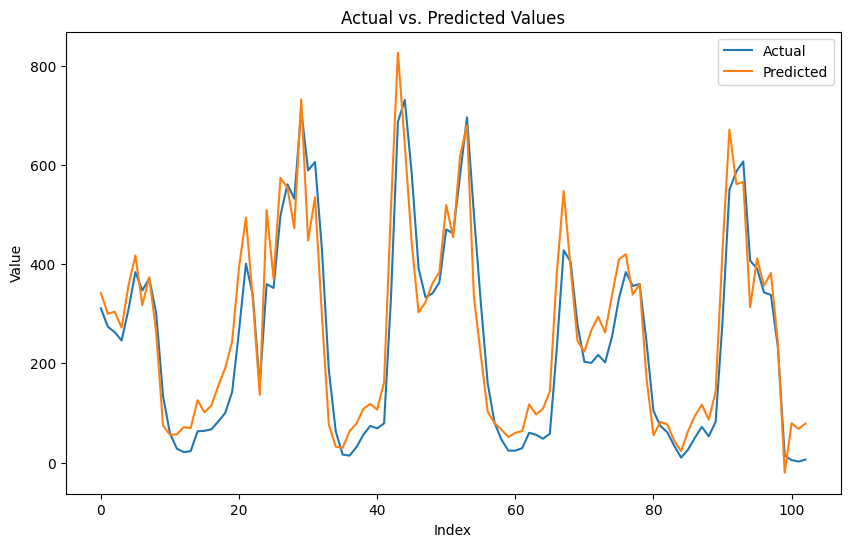

In [71]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

AIRPORT

In [251]:
data=hourly_demand_airpot

In [252]:
train_data = data.iloc[:1450]
test_data = data.iloc[1451:]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 1
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))  # Added another LSTM layer
model.add(Dropout(0.5))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)

Epoch 1/100


46/46 [==============================] - 4s 36ms/step - loss: 0.0315 - val_loss: 0.0098
Epoch 2/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0181 - val_loss: 0.0065
Epoch 3/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0157 - val_loss: 0.0058
Epoch 4/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0143 - val_loss: 0.0056
Epoch 5/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0135 - val_loss: 0.0054
Epoch 6/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0135 - val_loss: 0.0053
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0129 - val_loss: 0.0053
Epoch 8/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0129 - val_loss: 0.0054
Epoch 9/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0131 - val_loss: 0.0054
Epoch 10/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0127 - val_loss: 0.0051
Epoch 11/10

In [253]:
y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

In [254]:
y_test_original = y_test * (y_max - y_min) + y_min
y_test_original_slit=y_test_original[0:200]
y_pred_original_slit=y_pred_original[0:200]
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

Mean Squared Error: 88.56311738016497
Root Mean Squared Error: 9.41079791410723
Mean Absolute Error: 7.277830980356457
R-squared Score: 0.5165781635861717


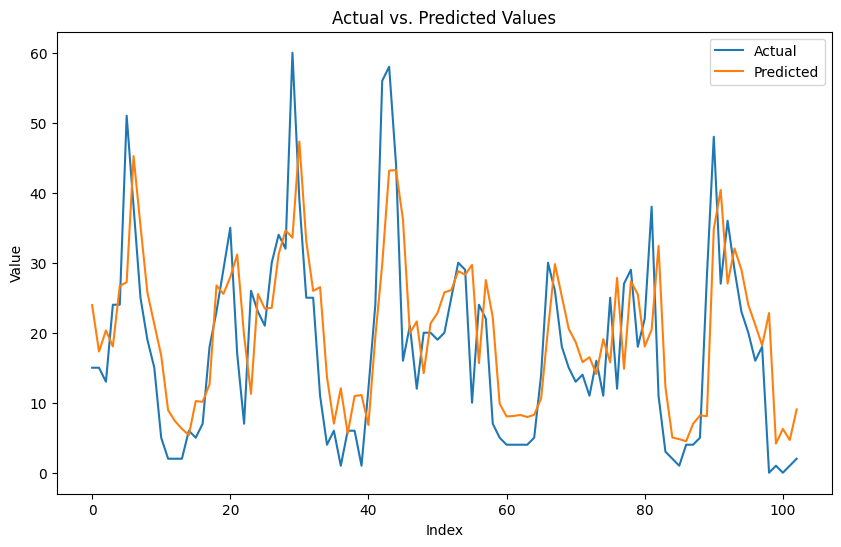

In [255]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [256]:
import joblib

joblib.dump(scaler, 'scaler_airport.pkl')
model.save('lstm_airport.h5')


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


DakshinDari

In [257]:
data=hourly_demand_dakshinDari

In [258]:
train_data = data.iloc[:1450]
test_data = data.iloc[1451:]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 1
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))  # Added another LSTM layer
model.add(Dropout(0.5))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)

Epoch 1/100
46/46 [==============================] - 10s 132ms/step - loss: 0.0157 - val_loss: 0.0045
Epoch 2/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0087 - val_loss: 0.0029
Epoch 3/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0071 - val_loss: 0.0031
Epoch 4/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0062 - val_loss: 0.0024
Epoch 5/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0058 - val_loss: 0.0023
Epoch 6/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0053 - val_loss: 0.0021
Epoch 7/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0050 - val_loss: 0.0020
Epoch 8/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0049 - val_loss: 0.0020
Epoch 9/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0046 - val_loss: 0.0019
Epoch 10/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0046 - val_loss: 0.00

In [259]:
y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

In [260]:
y_test_original = y_test * (y_max - y_min) + y_min
y_test_original_slit=y_test_original[0:200]
y_pred_original_slit=y_pred_original[0:200]
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

Mean Squared Error: 182.3374356288411
Root Mean Squared Error: 13.503237968311197
Mean Absolute Error: 10.088113696599493
R-squared Score: 0.709281842311571


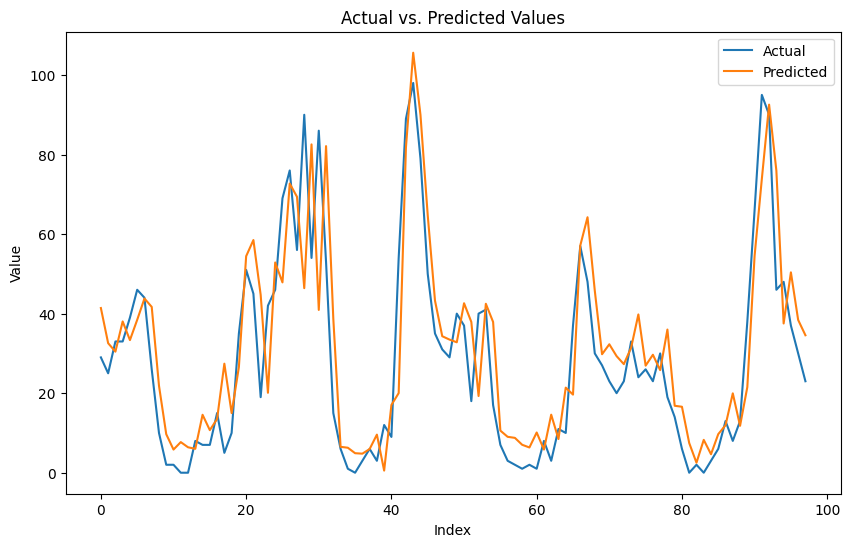

In [261]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [262]:
import joblib

joblib.dump(scaler, 'scaler_dakshindari.pkl')
model.save('lstm_dakshindari.h5')


/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Howrah

In [263]:
data=hourly_demand_howrah

Epoch 1/100
46/46 [==============================] - 6s 81ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 2/100
46/46 [==============================] - 1s 32ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 3/100
46/46 [==============================] - 1s 30ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 4/100
46/46 [==============================] - 1s 28ms/step - loss: 0.0022 - val_loss: 9.4679e-04
Epoch 5/100
46/46 [==============================] - 1s 19ms/step - loss: 0.0020 - val_loss: 8.3107e-04
Epoch 6/100
46/46 [==============================] - 1s 29ms/step - loss: 0.0019 - val_loss: 7.5881e-04
Epoch 7/100
46/46 [==============================] - 1s 26ms/step - loss: 0.0019 - val_loss: 6.6810e-04
Epoch 8/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 7.4376e-04
Epoch 9/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0017 - val_loss: 6.3299e-04
Epoch 10/100
46/46 [==============================] - 1s 14ms/step - loss: 0

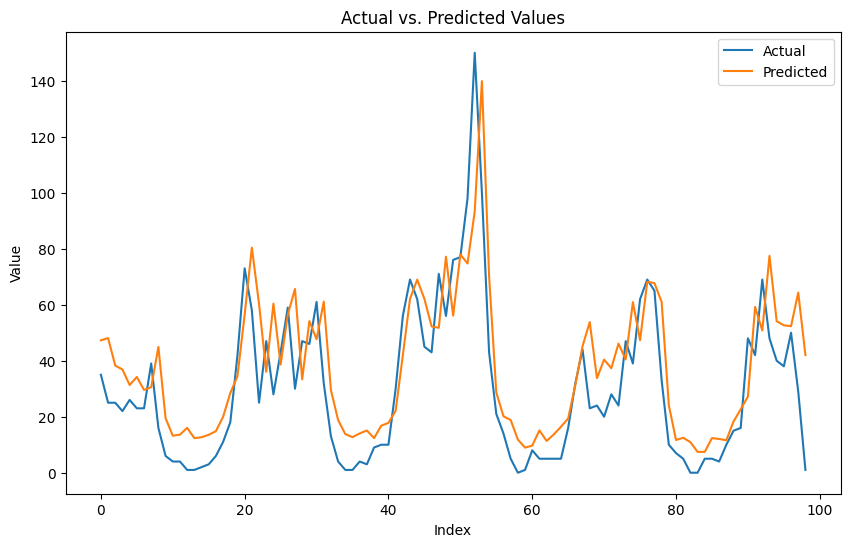

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [264]:
train_data = data.iloc[:1450]
test_data = data.iloc[1451:]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 1
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))  # Added another LSTM layer
model.add(Dropout(0.5))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)


y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

y_test_original = y_test * (y_max - y_min) + y_min
y_test_original_slit=y_test_original[0:200]
y_pred_original_slit=y_pred_original[0:200]
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

import joblib

joblib.dump(scaler, 'scaler_howrah.pkl')
model.save('lstm_howrah.h5')

Sector V

In [265]:
data=hourly_demand_sectorV

Epoch 1/100
46/46 [==============================] - 4s 29ms/step - loss: 0.0031 - val_loss: 6.1381e-04
Epoch 2/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0025 - val_loss: 5.2406e-04
Epoch 3/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 4.4052e-04
Epoch 4/100
46/46 [==============================] - 0s 11ms/step - loss: 0.0020 - val_loss: 2.7443e-04
Epoch 5/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 2.5811e-04
Epoch 6/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 2.4427e-04
Epoch 7/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0014 - val_loss: 2.2006e-04
Epoch 8/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 2.3012e-04
Epoch 9/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0012 - val_loss: 2.4887e-04
Epoch 10/100
46/46 [==============================] - 1s 16ms/st

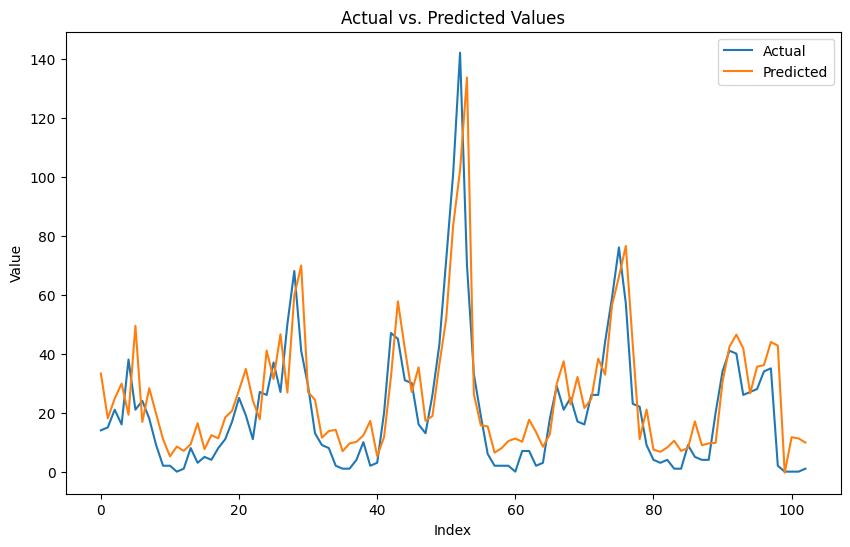

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [266]:
train_data = data.iloc[:1450]
test_data = data.iloc[1451:]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 1
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))  # Added another LSTM layer
model.add(Dropout(0.5))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)


y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

y_test_original = y_test * (y_max - y_min) + y_min
y_test_original_slit=y_test_original[0:200]
y_pred_original_slit=y_pred_original[0:200]
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

import joblib

joblib.dump(scaler, 'scaler_sectorV.pkl')
model.save('lstm_sectorV.h5')

Victoria

Epoch 1/100
46/46 [==============================] - 6s 35ms/step - loss: 0.0031 - val_loss: 6.6392e-04
Epoch 2/100
46/46 [==============================] - 1s 11ms/step - loss: 0.0025 - val_loss: 4.0326e-04
Epoch 3/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0021 - val_loss: 3.6833e-04
Epoch 4/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 3.5195e-04
Epoch 5/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0017 - val_loss: 2.9557e-04
Epoch 6/100
46/46 [==============================] - 1s 20ms/step - loss: 0.0016 - val_loss: 2.5290e-04
Epoch 7/100
46/46 [==============================] - 1s 17ms/step - loss: 0.0014 - val_loss: 2.3916e-04
Epoch 8/100
46/46 [==============================] - 1s 15ms/step - loss: 0.0013 - val_loss: 2.2780e-04
Epoch 9/100
46/46 [==============================] - 1s 29ms/step - loss: 0.0012 - val_loss: 1.9861e-04
Epoch 10/100
46/46 [==============================] - 1s 16ms/st

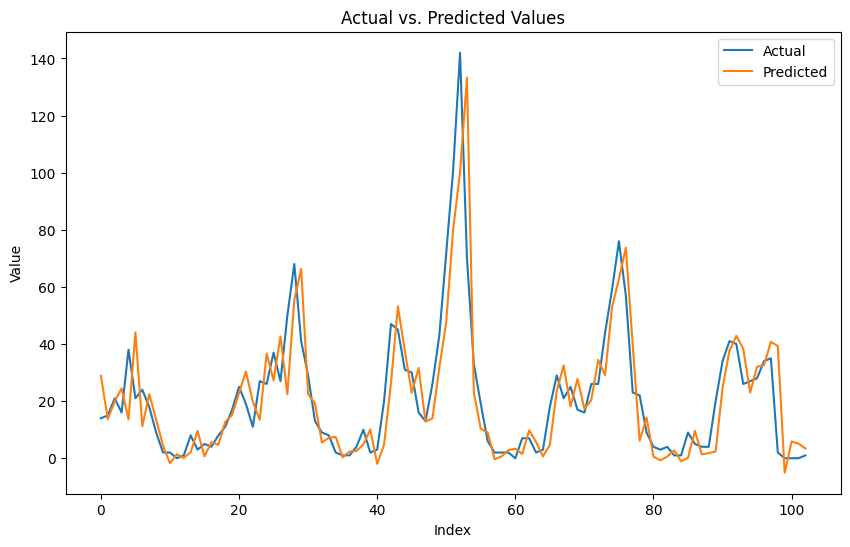

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [267]:
train_data = data.iloc[:1450]
test_data = data.iloc[1451:]

# Normalize data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Define the number of time steps and features
TIME_STEPS = 1
N_FEATURES = train_data_scaled.shape[1] - 1  # Excluding the target variable 'y'

# Create input and target sequences for train and test data
def create_sequences(data, time_steps=TIME_STEPS):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps, :-1])  # Input sequence (excluding target)
        y.append(data[i+time_steps, 0])  # Target variable ('y')
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data_scaled)
X_test, y_test = create_sequences(test_data_scaled)

# Reshape input data for LSTM
X_train = X_train.reshape(X_train.shape[0], TIME_STEPS, N_FEATURES)
X_test = X_test.reshape(X_test.shape[0], TIME_STEPS, N_FEATURES)

# Build the LSTM model

model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))  # Added another LSTM layer
model.add(Dropout(0.5))  # Added a Dropout layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred = model.predict(X_test)


y_min = scaler.data_min_[0]  # Assuming 'y' is the first column
y_max = scaler.data_max_[0]  # Assuming 'y' is the first column

# Inverse transform predictions to original scale
y_pred_original = y_pred * (y_max - y_min) + y_min

y_test_original = y_test * (y_max - y_min) + y_min
y_test_original_slit=y_test_original[0:200]
y_pred_original_slit=y_pred_original[0:200]
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original_slit, y_pred_original_slit)

print("Mean Squared Error:", mse)

import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_original_slit, y_pred_original_slit))

print("Root Mean Squared Error:", rmse)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test_original_slit, y_pred_original_slit)

print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

r2 = r2_score(y_test_original_slit, y_pred_original_slit)

print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.plot(y_test_original_slit, label='Actual')
plt.plot(y_pred_original_slit, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

import joblib

joblib.dump(scaler, 'scaler_victoria.pkl')
model.save('lstm_victoria.h5')

In [269]:
hourly_demand

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
25,12,0.0,0.0,29.60,46.0,247.0,260.0,64.0
26,19,0.0,0.0,29.55,12.0,295.0,215.0,17.0
27,5,0.0,0.0,28.98,19.0,432.0,259.0,9.0
28,10,0.0,0.0,28.98,5.0,457.0,246.0,21.0
29,9,0.0,0.0,29.15,10.0,270.0,247.0,23.0
...,...,...,...,...,...,...,...,...
1578,14,0.0,0.0,36.01,234.0,550.0,72.0,331.0
1579,5,0.0,0.0,34.70,14.0,587.0,53.0,384.0
1580,2,0.0,0.0,33.52,5.0,607.0,82.0,356.0
1581,6,0.0,0.0,32.62,2.0,407.0,285.0,360.0


In [271]:
hourly_demand.tail(24)

,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
1559,104,0.0,0.0,28.84,242.0,217.0,405.0,160.0
1560,74,0.0,0.0,28.18,104.0,202.0,278.0,80.0
1561,61,0.0,0.0,28.36,74.0,254.0,203.0,46.0
1562,34,0.0,0.0,28.53,61.0,331.0,201.0,24.0
1563,10,0.0,0.0,28.41,34.0,384.0,217.0,24.0
1564,26,0.0,0.0,28.65,10.0,356.0,202.0,29.0
1565,50,0.0,0.0,29.06,26.0,360.0,254.0,60.0
1566,72,0.0,0.0,28.74,50.0,242.0,331.0,56.0
1567,53,0.0,0.0,28.79,72.0,104.0,384.0,48.0
1568,82,0.0,0.0,29.33,53.0,74.0,356.0,58.0


In [ ]:
hourly_demand.to_excel("hourly_demand")

In [74]:
hourly_demand_airpot=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_airport.csv")
hourly_demand_dakshinDari=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_dakshindari.csv")
hourly_demand_howrah=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_howrah.csv")
hourly_demand_sectorV=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_sectorV.csv")
hourly_demand_victoria=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_victoria.csv")

In [93]:
hourly_demand_dakshinDari=pd.read_csv("/Users/aayushjain/codes/projects/company assignements/Snape/City Heatmap/model/Hourly Demand Patter/demand_dakshindari.csv")


In [94]:
hourly_demand_dakshinDari=hourly_demand_dakshinDari[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]


In [75]:
hourly_demand_airpot=hourly_demand_airpot[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_dakshinDari=hourly_demand_dakshinDari=[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_howrah=hourly_demand_howrah[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_sectorV=hourly_demand_sectorV[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]

hourly_demand_victoria=hourly_demand_victoria[['y'	,'rain_intensity'	,'rain_accumulation',	'temperature'	,'lag_1',	'lag_8',	'lag_12'	,'lag_24']]


In [82]:

data=hourly_demand_airpot

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

joblib.dump(scaler_X, 'scaler_x_airport.pkl')
joblib.dump(scaler_y, 'scaler_y_airport.pkl')
model.save('lstm_airport.h5')


Epoch 1/100
46/46 [==============================] - 4s 33ms/step - loss: 0.0324 - val_loss: 0.0111
Epoch 2/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0202 - val_loss: 0.0081
Epoch 3/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0169 - val_loss: 0.0071
Epoch 4/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0158 - val_loss: 0.0071
Epoch 5/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0161 - val_loss: 0.0071
Epoch 6/100
46/46 [==============================] - 1s 17ms/step - loss: 0.0159 - val_loss: 0.0072
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0161 - val_loss: 0.0071
Epoch 8/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0157 - val_loss: 0.0072
Epoch 9/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0157 - val_loss: 0.0082
Epoch 10/100
46/46 [==============================] - 1s 12ms/step - loss: 0.0160 - val_loss: 0.0071

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 123.73659218518462
Root Mean Squared Error (RMSE): 11.123695077859004
Mean Absolute Error (MAE): 8.17842632990617
R-squared (R2): 0.31928762762707685


In [96]:
data=hourly_demand_dakshinDari

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

joblib.dump(scaler_X, 'scaler_x_dakshindari.pkl')
joblib.dump(scaler_y, 'scaler_y_dakshindari.pkl')
model.save('lstm_dakshindar.h5')


Epoch 1/100
46/46 [==============================] - 6s 79ms/step - loss: 0.0166 - val_loss: 0.0054
Epoch 2/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0103 - val_loss: 0.0052
Epoch 3/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0088 - val_loss: 0.0044
Epoch 4/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0088 - val_loss: 0.0039
Epoch 5/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0082 - val_loss: 0.0039
Epoch 6/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0081 - val_loss: 0.0040
Epoch 7/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0082 - val_loss: 0.0038
Epoch 8/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0081 - val_loss: 0.0039
Epoch 9/100
46/46 [==============================] - 1s 13ms/step - loss: 0.0081 - val_loss: 0.0038
Epoch 10/100
46/46 [==============================] - 1s 14ms/step - loss: 0.0079 - val_loss: 0.0042

/Users/aayushjain/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Compute MSE
mse = mean_squared_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute RMSE
rmse = np.sqrt(mse)

# Compute MAE
mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_pred)

# Compute R2
r2 = r2_score(scaler_y.inverse_transform(y_test), y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)


Mean Squared Error (MSE): 428.551767515925
Root Mean Squared Error (RMSE): 20.701491915220146
Mean Absolute Error (MAE): 16.932337621245722
R-squared (R2): 0.31023202271252437


In [103]:
y_min = scaler_y.data_min_[0] 
y_max = scaler_y.data_max_[0] 

In [104]:
y_pred_original = y_pred * (y_max - y_min) + y_min

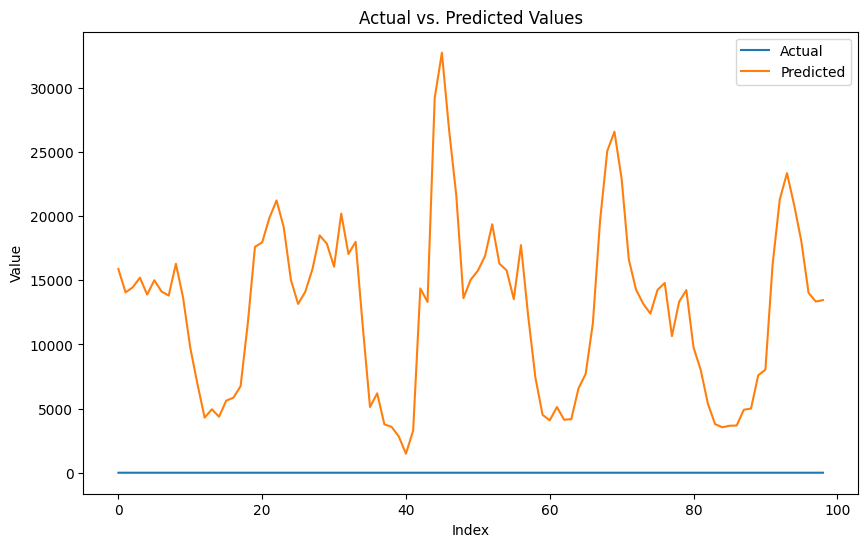

In [105]:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()

In [11]:
import pandas as pd

In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshaxpe(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

import joblib
joblib.dump(scaler_X, 'scaler_x_kolkata_city.pkl')
joblib.dump(scaler_y, 'scaler_y_kolkata_city.pkl')
model.save('lstm_kolkata_city.h5')


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0073 - val_loss: 0.0021
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0042 - val_loss: 0.0016
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0030 - val_loss: 0.0013
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028 - val_loss: 0.0014
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031 - val_loss: 0.0015
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027 - val_loss: 0.0016
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0026 - val_loss: 0.0013
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_l

Predicted values: [[344.9584   ]
 [374.22256  ]
 [380.78497  ]
 [409.94473  ]
 [435.42636  ]
 [543.4245   ]
 [598.4558   ]
 [492.5057   ]
 [333.82867  ]
 [215.52025  ]
 [147.05179  ]
 [ 89.59132  ]
 [ 56.377438 ]
 [ 42.07013  ]
 [ 28.927557 ]
 [ 70.95603  ]
 [ 95.566505 ]
 [123.25346  ]
 [164.27357  ]
 [252.33165  ]
 [271.10718  ]
 [306.9287   ]
 [362.14188  ]
 [372.0024   ]
 [368.51248  ]
 [336.37225  ]
 [330.63446  ]
 [323.96368  ]
 [304.3297   ]
 [335.79376  ]
 [370.58533  ]
 [354.60385  ]
 [344.7431   ]
 [285.29776  ]
 [151.79393  ]
 [ 54.571297 ]
 [  3.6368074]
 [ 12.352867 ]
 [-24.982153 ]
 [ 32.034107 ]
 [ 32.95451  ]
 [ 64.20427  ]
 [171.06895  ]
 [195.97778  ]
 [238.58333  ]
 [306.92014  ]
 [401.81836  ]
 [393.04156  ]
 [245.49855  ]
 [359.61923  ]
 [350.7121   ]
 [429.85208  ]
 [502.0279   ]
 [470.13626  ]
 [549.171    ]
 [432.87695  ]
 [390.46735  ]
 [311.77338  ]
 [167.95436  ]
 [ 43.69658  ]
 [ -3.359101 ]
 [-26.76049  ]
 [-29.77126  ]
 [ 34.392673 ]
 [ 72.67669  ]
 [122.8

In [20]:
hourly_demand_airpot

,Unnamed: 0,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
0,25,4,0.0,0.0,29.60,14.0,5.0,6.0,12.0
1,26,5,0.0,0.0,29.55,4.0,5.0,17.0,3.0
2,27,1,0.0,0.0,28.98,5.0,7.0,2.0,1.0
3,28,1,0.0,0.0,28.98,1.0,8.0,10.0,0.0
4,29,1,0.0,0.0,29.15,1.0,7.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...
1550,1578,0,0.0,0.0,36.01,18.0,48.0,4.0,11.0
1551,1579,1,0.0,0.0,34.70,0.0,27.0,4.0,25.0
1552,1580,0,0.0,0.0,33.52,1.0,36.0,5.0,12.0
1553,1581,1,0.0,0.0,32.62,0.0,29.0,28.0,27.0


In [17]:

data=hourly_demand_airpot

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

joblib.dump(scaler_X, 'scaler_x_airport.pkl')
joblib.dump(scaler_y, 'scaler_y_airport.pkl')
model.save('lstm_airport.h5')


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0405 - val_loss: 0.0139
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0192 - val_loss: 0.0089
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0186 - val_loss: 0.0078
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - val_loss: 0.0079
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0165 - val_loss: 0.0075
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0177 - val_loss: 0.0072
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0162 - val_loss: 0.0072
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0154 - val_loss: 0.0073
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0166 - val_loss: 0.0071
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 - val_loss: 0.0072
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 - val_loss: 0.0074
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170 - val_l

In [7]:
data=hourly_demand_dakshinDari

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

joblib.dump(scaler_X, 'scaler_x_dakshindari.pkl')
joblib.dump(scaler_y, 'scaler_y_dakshindari.pkl')
model.save('lstm_dakshindari.h5')


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0219 - val_loss: 0.0054
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0109 - val_loss: 0.0048
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - val_loss: 0.0037
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0093 - val_loss: 0.0043
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0095 - val_loss: 0.0037
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - loss: 0.0084 - val_loss: 0.0041
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0084 - val_loss: 0.0037
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0085 - val_loss: 0.0041
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0090 - val_loss: 0.0039
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0081 - val_loss: 0.0041
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0075 - val_loss: 0.0038
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0084 - va

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x31cf43b00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


Predicted values: [[39.1074   ]
 [33.72135  ]
 [34.179375 ]
 [35.908306 ]
 [32.239643 ]
 [35.857388 ]
 [34.27169  ]
 [33.093834 ]
 [39.100952 ]
 [32.27749  ]
 [21.977642 ]
 [14.066205 ]
 [ 7.0500646]
 [ 8.83524  ]
 [ 7.3819227]
 [11.034017 ]
 [11.59045  ]
 [13.558912 ]
 [26.82442  ]
 [43.82799  ]
 [43.67371  ]
 [47.80535  ]
 [52.02496  ]
 [46.93244  ]
 [36.45633  ]
 [30.53399  ]
 [33.345375 ]
 [38.967598 ]
 [46.070045 ]
 [43.314163 ]
 [38.40403  ]
 [49.66509  ]
 [41.04978  ]
 [43.918797 ]
 [26.314613 ]
 [10.922746 ]
 [14.05237  ]
 [ 6.356284 ]
 [ 8.94247  ]
 [ 3.886405 ]
 [ 3.4906123]
 [ 4.992159 ]
 [33.46289  ]
 [31.77148  ]
 [77.367004 ]
 [84.82149  ]
 [67.937805 ]
 [53.72608  ]
 [32.875004 ]
 [34.792397 ]
 [36.51575  ]
 [39.682705 ]
 [47.849686 ]
 [41.227    ]
 [39.167374 ]
 [31.345268 ]
 [41.114334 ]
 [26.498177 ]
 [14.315866 ]
 [ 7.1903315]
 [ 5.8563643]
 [ 8.337898 ]
 [ 6.0750184]
 [ 6.281052 ]
 [12.281334 ]
 [15.167351 ]
 [26.522442 ]
 [45.515354 ]
 [59.587917 ]
 [64.41462  ]
 [

In [8]:

data=hourly_demand_sectorV

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

joblib.dump(scaler_X, 'scaler_x_sectorV.pkl')
joblib.dump(scaler_y, 'scaler_y_sectorV.pkl')
model.save('lstm_sectorV.h5')

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0043 - val_loss: 0.0012
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 7.7672e-04
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 8.1277e-04
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 7.9130e-04
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0024 - val_loss: 5.1214e-04
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017 - val_loss: 0.0010
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0016 - val_loss: 6.4766e-04
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022 - val_loss: 6.1262e-04
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 4.7106e-04
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017 - val_loss: 9.2957e-04
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [18]:
hourly_demand_sectorV

,Unnamed: 0,y,rain_intensity,rain_accumulation,temperature,lag_1,lag_8,lag_12,lag_24
0,25,2,0.0,0.0,29.60,4.0,28.0,3.0,2.0
1,26,0,0.0,0.0,29.55,2.0,24.0,5.0,0.0
2,27,0,0.0,0.0,28.98,0.0,69.0,12.0,3.0
3,28,0,0.0,0.0,28.98,0.0,52.0,8.0,0.0
4,29,1,0.0,0.0,29.15,0.0,27.0,28.0,0.0
...,...,...,...,...,...,...,...,...,...
1550,1578,2,0.0,0.0,36.01,35.0,34.0,5.0,59.0
1551,1579,0,0.0,0.0,34.70,2.0,41.0,4.0,76.0
1552,1580,0,0.0,0.0,33.52,0.0,40.0,4.0,57.0
1553,1581,0,0.0,0.0,32.62,0.0,26.0,20.0,23.0


In [9]:

data=hourly_demand_victoria

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

joblib.dump(scaler_X, 'scaler_x_victoria.pkl')
joblib.dump(scaler_y, 'scaler_y_victoria.pkl')
model.save('lstm_victoria.h5')

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0033 - val_loss: 7.1028e-04
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0021 - val_loss: 5.3602e-04
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 4.8331e-04
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0015 - val_loss: 5.2326e-04
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0038 - val_loss: 4.7837e-04
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0019 - val_loss: 4.6999e-04
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 4.5314e-04
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0018 - val_loss: 6.2897e-04
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 3.9569e-04
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 4.0853e-04
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039 - val_loss: 4.0874e-04
Epoch 12/100
46/46 ━━━━━━━━━━━━

Predicted values: [[ 2.3937571e+01]
 [ 2.2180225e+01]
 [ 2.3544359e+01]
 [ 2.2159294e+01]
 [ 2.8440609e+01]
 [ 4.2086529e+01]
 [ 4.5185520e+01]
 [ 3.4229618e+01]
 [ 2.3268406e+01]
 [ 2.7048578e+01]
 [ 1.7157352e+01]
 [ 7.9049673e+00]
 [ 1.2296623e+00]
 [ 1.5132241e-02]
 [ 1.2365332e+00]
 [ 2.6117575e-01]
 [ 3.6802166e+00]
 [ 8.6757839e-02]
 [ 1.8454984e+00]
 [ 5.0216908e+00]
 [ 6.8834205e+00]
 [ 9.4227877e+00]
 [ 1.1777001e+01]
 [ 1.7241779e+01]
 [ 1.9630259e+01]
 [ 1.4985970e+01]
 [ 2.2937485e+01]
 [ 1.6419930e+01]
 [ 2.9900518e+01]
 [ 2.7784391e+01]
 [ 2.3328455e+01]
 [ 3.1365782e+01]
 [ 4.3169346e+01]
 [ 4.2190186e+01]
 [ 3.4028465e+01]
 [ 1.3425380e+01]
 [ 2.0804582e+00]
 [ 1.1539754e+00]
 [-1.5327981e+00]
 [ 1.0112280e+00]
 [-3.4647074e+00]
 [-2.9183478e+00]
 [ 2.0178421e+00]
 [ 1.8960978e+00]
 [ 5.9821577e+00]
 [ 1.2830613e+01]
 [ 2.3782835e+01]
 [ 2.6316193e+01]
 [ 1.6534395e+01]
 [ 2.7039497e+01]
 [ 2.5933250e+01]
 [ 4.0772259e+01]
 [ 4.2802631e+01]
 [ 4.1660549e+01]
 [ 5.31673

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data=hourly_demand_howrah

train_data = data.iloc[:1450]  
test_data = data.iloc[1450:]

# Separate features and target
X_train_raw = train_data.drop('y', axis=1).values
y_train_raw = train_data['y'].values.reshape(-1, 1)
X_test_raw = test_data.drop('y', axis=1).values
y_test_raw = test_data['y'].values.reshape(-1, 1)

# Scale features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_train_scaled = scaler_X.fit_transform(X_train_raw)
y_train_scaled = scaler_y.fit_transform(y_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)
y_test_scaled = scaler_y.transform(y_test_raw)

# Create sequences for the LSTM model
TIME_STEPS = 1
N_FEATURES = X_train_scaled.shape[1]

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:i+time_steps])
        ys.append(y[i+time_steps])
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(X_train_scaled, y_train_scaled)
X_test, y_test = create_sequences(X_test_scaled, y_test_scaled)

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(TIME_STEPS, N_FEATURES), return_sequences=True))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions on test data
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

print("Predicted values:", y_pred)
print("Actual values:", scaler_y.inverse_transform(y_test))

import joblib
joblib.dump(scaler_X, 'scaler_x_howrah.pkl')
joblib.dump(scaler_y, 'scaler_y_howrah.pkl')
model.save('lstm_howrah.h5')


Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0051 - val_loss: 0.0022
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0013
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0011
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0035 - val_loss: 0.0013
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 12/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0036 - val_lo

Predicted values: [[ 40.74887   ]
 [ 51.720493  ]
 [ 47.064976  ]
 [ 54.59853   ]
 [ 49.577923  ]
 [ 58.677925  ]
 [ 57.015274  ]
 [ 45.505257  ]
 [ 34.869564  ]
 [ 28.41854   ]
 [ 21.367594  ]
 [  7.554823  ]
 [  5.0571446 ]
 [  5.0984    ]
 [  5.429389  ]
 [  3.7125134 ]
 [  6.062479  ]
 [ 15.177717  ]
 [ 16.881287  ]
 [ 31.750902  ]
 [ 22.33581   ]
 [ 26.897697  ]
 [ 35.91743   ]
 [ 49.123833  ]
 [ 50.980873  ]
 [ 40.458057  ]
 [ 47.083042  ]
 [ 37.435387  ]
 [ 38.942883  ]
 [ 40.927612  ]
 [ 31.986084  ]
 [ 32.906746  ]
 [ 30.467344  ]
 [ 37.895203  ]
 [ 20.441584  ]
 [  8.281949  ]
 [  2.233509  ]
 [  5.279304  ]
 [ -0.62156016]
 [ -0.31549937]
 [ -1.8495599 ]
 [  3.4886086 ]
 [ 12.022776  ]
 [ 17.052954  ]
 [ 25.985817  ]
 [ 42.25387   ]
 [ 61.236202  ]
 [ 60.53873   ]
 [ 40.61037   ]
 [ 48.83322   ]
 [ 46.801716  ]
 [ 50.148563  ]
 [ 64.6196    ]
 [ 48.614292  ]
 [ 59.860615  ]
 [ 63.429256  ]
 [ 50.31635   ]
 [ 24.356636  ]
 [ 10.713949  ]
 [  0.7831421 ]
 [ -4.449783  ]
 [ -8.